In [1]:
import pdb
import numpy as np
from matplotlib import pyplot as plt
import random

In [2]:
def generateSample(N):
    
    # add your implementation
    
    # generate X with shape (N,1) 
    # append ones to each x in X, then X will be of shape (N,2) 
    # generate Y with shape (N,1)
    X = np.append(np.ones((N, 1)), np.random.randn(N, 1), axis = 1)
    Y = np.random.randn(N, 1) + X[:, 1][:, np.newaxis]
    return X, Y

In [3]:
def fitModel_gradient(X, Y):
    
    # add your implementation
    
    # initialize weights W with shape (2,1) 
    # foreach epoch
    # 1. Calculate predictions P = X * W
    # 2. Calculate error = P - Y 
    # 3. Calculate gradient = X.T * error / N
    # 4. Update weights  W = W - lr * gradient
    lr = 1#0.001
    W = np.zeros((2, 1))
    P = X @ W
    error = P - Y
    gradient = X.T @ error / N
    W = W - lr * gradient
    return W
    
def fitModel_stochastic_gradient(X, Y):

    # add your implementation
    
    # initialize weights W with shape (2,1)
    # foreach epoch
    # Shuffle training samples (careful to shuffle X and Y in the same order!)
    # foreach sample xi,yi
    # 1. Calculate sample prediction pi =W0+W1 xi
    # 2. Calculate error = pi - yi
    # 3. Calculate gradient = xi * error 
    # 4. Update weights  W = W - lr * gradient
    N = X.shape[0]
    lr = 0.001
    num_epochs = 100
    W = np.zeros((2, 1))
    for epoch in range(num_epochs):
        s = np.arange(X.shape[0])
        s = np.random.shuffle(s)
        X = X[s].squeeze()
        Y = Y[s].squeeze()
        for i in range(X.shape[0]):
            x = np.expand_dims(X[i], axis = 1)
            y = np.expand_dims(Y[i], axis = 1)
            #pdb.set_trace()
            error = (np.dot(W.T, x) - y).squeeze()
            gradient = x * error           
            W = W - lr * gradient
    return W

In [4]:
def plotModel(x, y, w):
    plt.plot(x[:,1], y, "x")
    plt.plot(x[:,1], np.dot(x, w), "r-")
    plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.


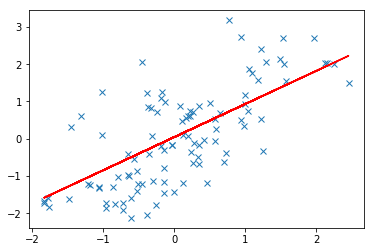

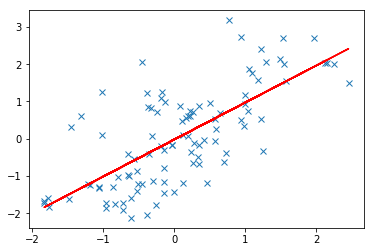

In [5]:
N = 100
X, Y = generateSample(N)
w_gd = fitModel_gradient(X, Y)
w_sgd = fitModel_stochastic_gradient(X, Y)
plotModel(X,Y,w_gd)
plotModel(X,Y,w_sgd)